In [1]:
# This tutorial will briefly show the main components of the aerodynamic reduced order model.
# We will create the database, create the physical model, and finally use them to plot the training signal
# that has been used, and the corresponding lift coefficient obtained.
# We will also plot the main PODs of the surface flow to understand how to manipulate the main data.
# After the completion of this tutorial you should be able to manipulate the training data to extract and
# plot quantities of interest.

In [2]:
# First, we perform the aerodynamic simulation with SU2. Please refer to the tutorial at 
# https://su2code.github.io/tutorials/Dynamic_FSI_Python/ for more details.

In [3]:
# Assuming that we correctly configured the SU2 simulation, we now have this list of output files:
# 1) The StructHistoryModal.dat file, containing the structural inputs that we provided to the system
# 2) A set of surface_flow.csv files, containing the aerodynamic solution at each time step of the training process

In [4]:
# Second, we launch again the same aerodynamic simulation, this time including the keyword "MAPPING_MODES = YES" in
# solid.cfg file. This will not actually run the simulation, but only print the normals and the modal shapes.

In [5]:
# If everything was correctly configured, we now have these files:
# 1) A file called Normals.csv, containing the normal to all the surface cells. Please note that the norm of these normals
# correspond to the area of the cell
# 2) A file called Undeformed.csv, containing the position of the cells in the undeformed configuration
# 3) A se of files called Mode.csv, containing the positions of the cells for the different modal shapes

In [6]:
# We are now ready to build our database.

# import the aerodynamic module
import os
os.chdir("..")
import aerodynamics
os.chdir("Tutorials")

# location of the structural history file
stru_history = "/mnt/d/Desktop/PhD/pysu2DMD/blendedStep/StructHistoryModal.dat"

# location of the aerodynamic history files
aero_history = "/mnt/d/Desktop/PhD/pysu2DMD/blendedStep/surface_flow.csv"
# note that all the files are called surface_flow_00xxx.csv, with xxx the time iteration
# it is sufficient to put the main name, the code will then scan for the requested time iterations

In [7]:
# creation of the database
database = aerodynamics.database(stru_history,aero_history)

Creating the database for the reduced order model.
Importing the data from the files.
Opened structural history file /mnt/d/Desktop/PhD/pysu2DMD/blendedStep/StructHistoryModal.dat.
Completed reading
Starting the reading of surface_flow.csv files.
Opened file 99 of 1099
Opened file 100 of 1099
Opened file 101 of 1099
Opened file 102 of 1099
Opened file 103 of 1099
Opened file 104 of 1099
Opened file 105 of 1099
Opened file 106 of 1099
Opened file 107 of 1099
Opened file 108 of 1099
Opened file 109 of 1099
Opened file 110 of 1099
Opened file 111 of 1099
Opened file 112 of 1099
Opened file 113 of 1099
Opened file 114 of 1099
Opened file 115 of 1099
Opened file 116 of 1099
Opened file 117 of 1099
Opened file 118 of 1099
Opened file 119 of 1099
Opened file 120 of 1099
Opened file 121 of 1099
Opened file 122 of 1099
Opened file 123 of 1099
Opened file 124 of 1099
Opened file 125 of 1099
Opened file 126 of 1099
Opened file 127 of 1099
Opened file 128 of 1099
Opened file 129 of 1099
Opened fil

Opened file 431 of 1099
Opened file 432 of 1099
Opened file 433 of 1099
Opened file 434 of 1099
Opened file 435 of 1099
Opened file 436 of 1099
Opened file 437 of 1099
Opened file 438 of 1099
Opened file 439 of 1099
Opened file 440 of 1099
Opened file 441 of 1099
Opened file 442 of 1099
Opened file 443 of 1099
Opened file 444 of 1099
Opened file 445 of 1099
Opened file 446 of 1099
Opened file 447 of 1099
Opened file 448 of 1099
Opened file 449 of 1099
Opened file 450 of 1099
Opened file 451 of 1099
Opened file 452 of 1099
Opened file 453 of 1099
Opened file 454 of 1099
Opened file 455 of 1099
Opened file 456 of 1099
Opened file 457 of 1099
Opened file 458 of 1099
Opened file 459 of 1099
Opened file 460 of 1099
Opened file 461 of 1099
Opened file 462 of 1099
Opened file 463 of 1099
Opened file 464 of 1099
Opened file 465 of 1099
Opened file 466 of 1099
Opened file 467 of 1099
Opened file 468 of 1099
Opened file 469 of 1099
Opened file 470 of 1099
Opened file 471 of 1099
Opened file 472 

Opened file 773 of 1099
Opened file 774 of 1099
Opened file 775 of 1099
Opened file 776 of 1099
Opened file 777 of 1099
Opened file 778 of 1099
Opened file 779 of 1099
Opened file 780 of 1099
Opened file 781 of 1099
Opened file 782 of 1099
Opened file 783 of 1099
Opened file 784 of 1099
Opened file 785 of 1099
Opened file 786 of 1099
Opened file 787 of 1099
Opened file 788 of 1099
Opened file 789 of 1099
Opened file 790 of 1099
Opened file 791 of 1099
Opened file 792 of 1099
Opened file 793 of 1099
Opened file 794 of 1099
Opened file 795 of 1099
Opened file 796 of 1099
Opened file 797 of 1099
Opened file 798 of 1099
Opened file 799 of 1099
Opened file 800 of 1099
Opened file 801 of 1099
Opened file 802 of 1099
Opened file 803 of 1099
Opened file 804 of 1099
Opened file 805 of 1099
Opened file 806 of 1099
Opened file 807 of 1099
Opened file 808 of 1099
Opened file 809 of 1099
Opened file 810 of 1099
Opened file 811 of 1099
Opened file 812 of 1099
Opened file 813 of 1099
Opened file 814 

0.0
0.0
1.3957491187288031e-05
5.575672732049021e-05
0.00012517838040337892
0.0002218581827250095
0.0003452888382369265
0.0004948226844253897
0.0006696750907113097
0.0008689285755458861
0.0010915376205988111
0.0013363341567781543
0.001602033693295795
0.0018872420576181192
0.0021904627109362662
0.0025101046007703514
0.0028444905095036666
0.003191865855040611
0.003550407897409749
0.003918235303003321
0.004293418016267942
0.004673987387047964
0.005057946500441577
0.005443280654967027
0.005827967934058167
0.00620998981541884
0.00658734176256692
0.006958043742992332
0.007320150617738342
0.007671762347890242
0.008011033964416098
0.00833618524904608
0.008645510075393058
0.008937385361299984
0.009210279585439476
0.009462760823477521
0.009693504261634086
0.009901299148215716
0.010085055146644132
0.010243808056645393
0.01037672487357954
0.010483108159363487
0.0105623997020522
0.010614183444875632
0.010638187669362323
0.01064
0.01064
0.01064
0.01064
0.01064
0.01064
0.01064
0.01064
0.01064
0.01064

0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0034
0.0033910797988652647
0.0033643660013365244
0.003319998779441444
0.00325821093585243
0.003179326682329774
0.0030837599385251154
0.0029720121600717055
0.0028446697073578773
0.002702400768790217
0.0025459518546906345
0.0023761438802244726
0.0021938678579132113
0.002000080222333943
0.0017957978115377214
0.00158209253152018

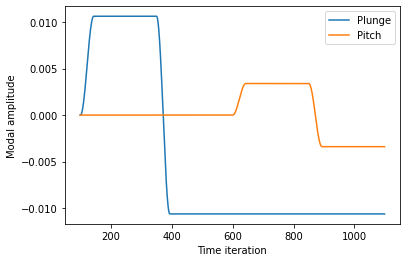

In [21]:
# plot of the training signals, per each mode
import matplotlib.pyplot as plt
nModes = database.U.shape[0]
for i in range(nModes):
    ax = plt.plot(database.timeIter, database.U[i,:]) # Each row is a different mode, each column a time iteration

# just make the plot pretty
plt.xlabel("Time iteration")
plt.ylabel("Modal amplitude")
plt.legend(["Plunge","Pitch"])

for i in range(len(database.U[0,:])):
    print(database.U[0,i])
for i in range(len(database.U[1,:])):
    print(database.U[1,i])

In [10]:
# We now want to plot the lift obtained with these inputs
# In order to do so we need a physical model of the system, to connect
# the database, containing a list of pressure values, with the application
# points of these pressures, and the direction of application to the surface
model = aerodynamics.physicalModel("/mnt/d/Desktop/PhD/pysu2DMD/Modes/Normals.csv","/mnt/d/Desktop/PhD/pysu2DMD/Modes/Mode.csv")
# Note that again we have more mode files, Mode0.csv, Mode1.csv, ecc... so we only give the main name

Creating the physical model.
Importing the data from the files.
Obtaining the normals to the different panels.
Completed reading
Obtaining the mode shapes
Starting with the undeformed condition
Obtain now the deformation due to modes
Opened file 0 of 2
Opened file 1 of 2
Completed reading
Done


481.03539597190263
480.96611062093973
480.7037498257543
480.36893267992633
480.1966033445186
480.04085976714697
479.9029400988588
479.77652238702535
479.65943602008764
479.5449846389926
479.4318617687119
479.3158863108805
479.1922138222132
479.0598999924687
478.91608594222873
478.7601382275653
478.592088240572
478.41465598128565
478.2300442240816
478.04296809771023
477.8563350267977
477.6763019170926
477.50580544868393
477.34958707842867
477.21270143121956
477.0987105798459
477.0110588933776
476.9534661920261
476.9271396591022
476.93400787987616
476.97436003045283
477.04908269129186
477.1536123072562
477.28922487961376
477.4539305133033
477.6450030463566
477.86173850796183
478.1016150710074
478.36169685959106
478.64071540819685
478.937738761977
479.24802054798454
479.5700630374487
479.9044242587212
480.25492123136235
480.49593203326003
480.454120336104
480.5470621335521
480.6531928462925
480.7456701326699
480.82097847248656
480.88164894078375
480.9344123868152
480.9796605411495
481.015

459.0387176653808
459.0387944429257
459.0388977963193
459.03902915896896
459.03921529997626
459.0394421169074
459.039691738877
459.03994780330555
459.0401930501014
459.0404220738908
459.0406258385435
459.04079515708975
459.0409245244947
459.0410331596431
459.0411296736117
459.0411874097848
459.0412238052899
459.0412612270676
459.0412725161406
459.04125579191236
459.04121052368
459.04114732798325
459.0410677873032
459.040965768402
459.0408408554713
459.04070324611047
459.04055939697304
459.040400308251
459.04020916211437
459.04002024412137
459.0398277089589
459.039623628773
459.0393854019751
459.0391246192071
459.0388408068867
459.0385958357288
459.03834690055106
459.03809562983554
459.0378844621069
459.037684235969
459.0375079240123
459.03729319735277
459.03712455445776
459.0369587130663
459.03681700656756
459.0366601687765
459.0365230184264
459.0363825303414
459.0362376153927
459.0360966093753
459.03597558735606
459.03587730873414
459.0358023714418
459.03571131164114
459.0356336443604

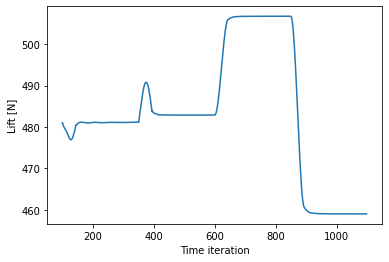

In [19]:
import numpy as np
# plot of the lift
nTimeIter = database.X.shape[1]
lift = []
for i in range(nTimeIter):
    lift = np.append(lift, model.getCl(database.X[:,i]))

plt.plot(database.timeIter, lift)
# just make the plot pretty
plt.xlabel("Time iteration")
plt.ylabel("Lift [N]")

for i in range(len(lift)):
    print(lift[i])

In [12]:
# We will now perform the SVD of the aerodynamic state
U, S, VT, Xmean = database.getShiftedStateSVD()

In [13]:
# The code will automatically apply an optimal threshold to cut the dimension of the matrices
U.shape

(86840, 374)

Text(0.5, 0, 'Index')

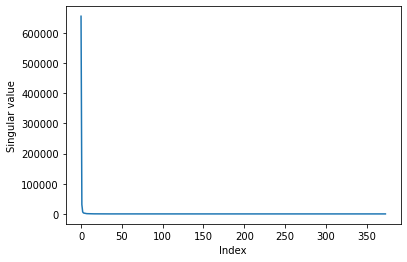

In [14]:
# In order to check the singular values we can plot them
plt.plot(np.diag(S))
plt.ylabel("Singular value")
plt.xlabel("Index")

Text(0.5, 0, 'Index')

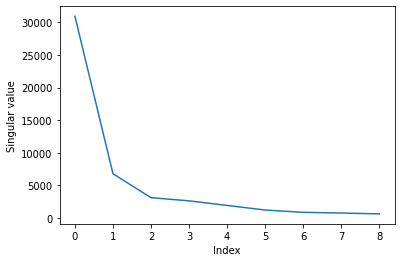

In [15]:
# They actually decrease extremely rapidly. If we focus on the first indices
plt.plot(np.diag(S)[1:10])
plt.ylabel("Singular value")
plt.xlabel("Index")

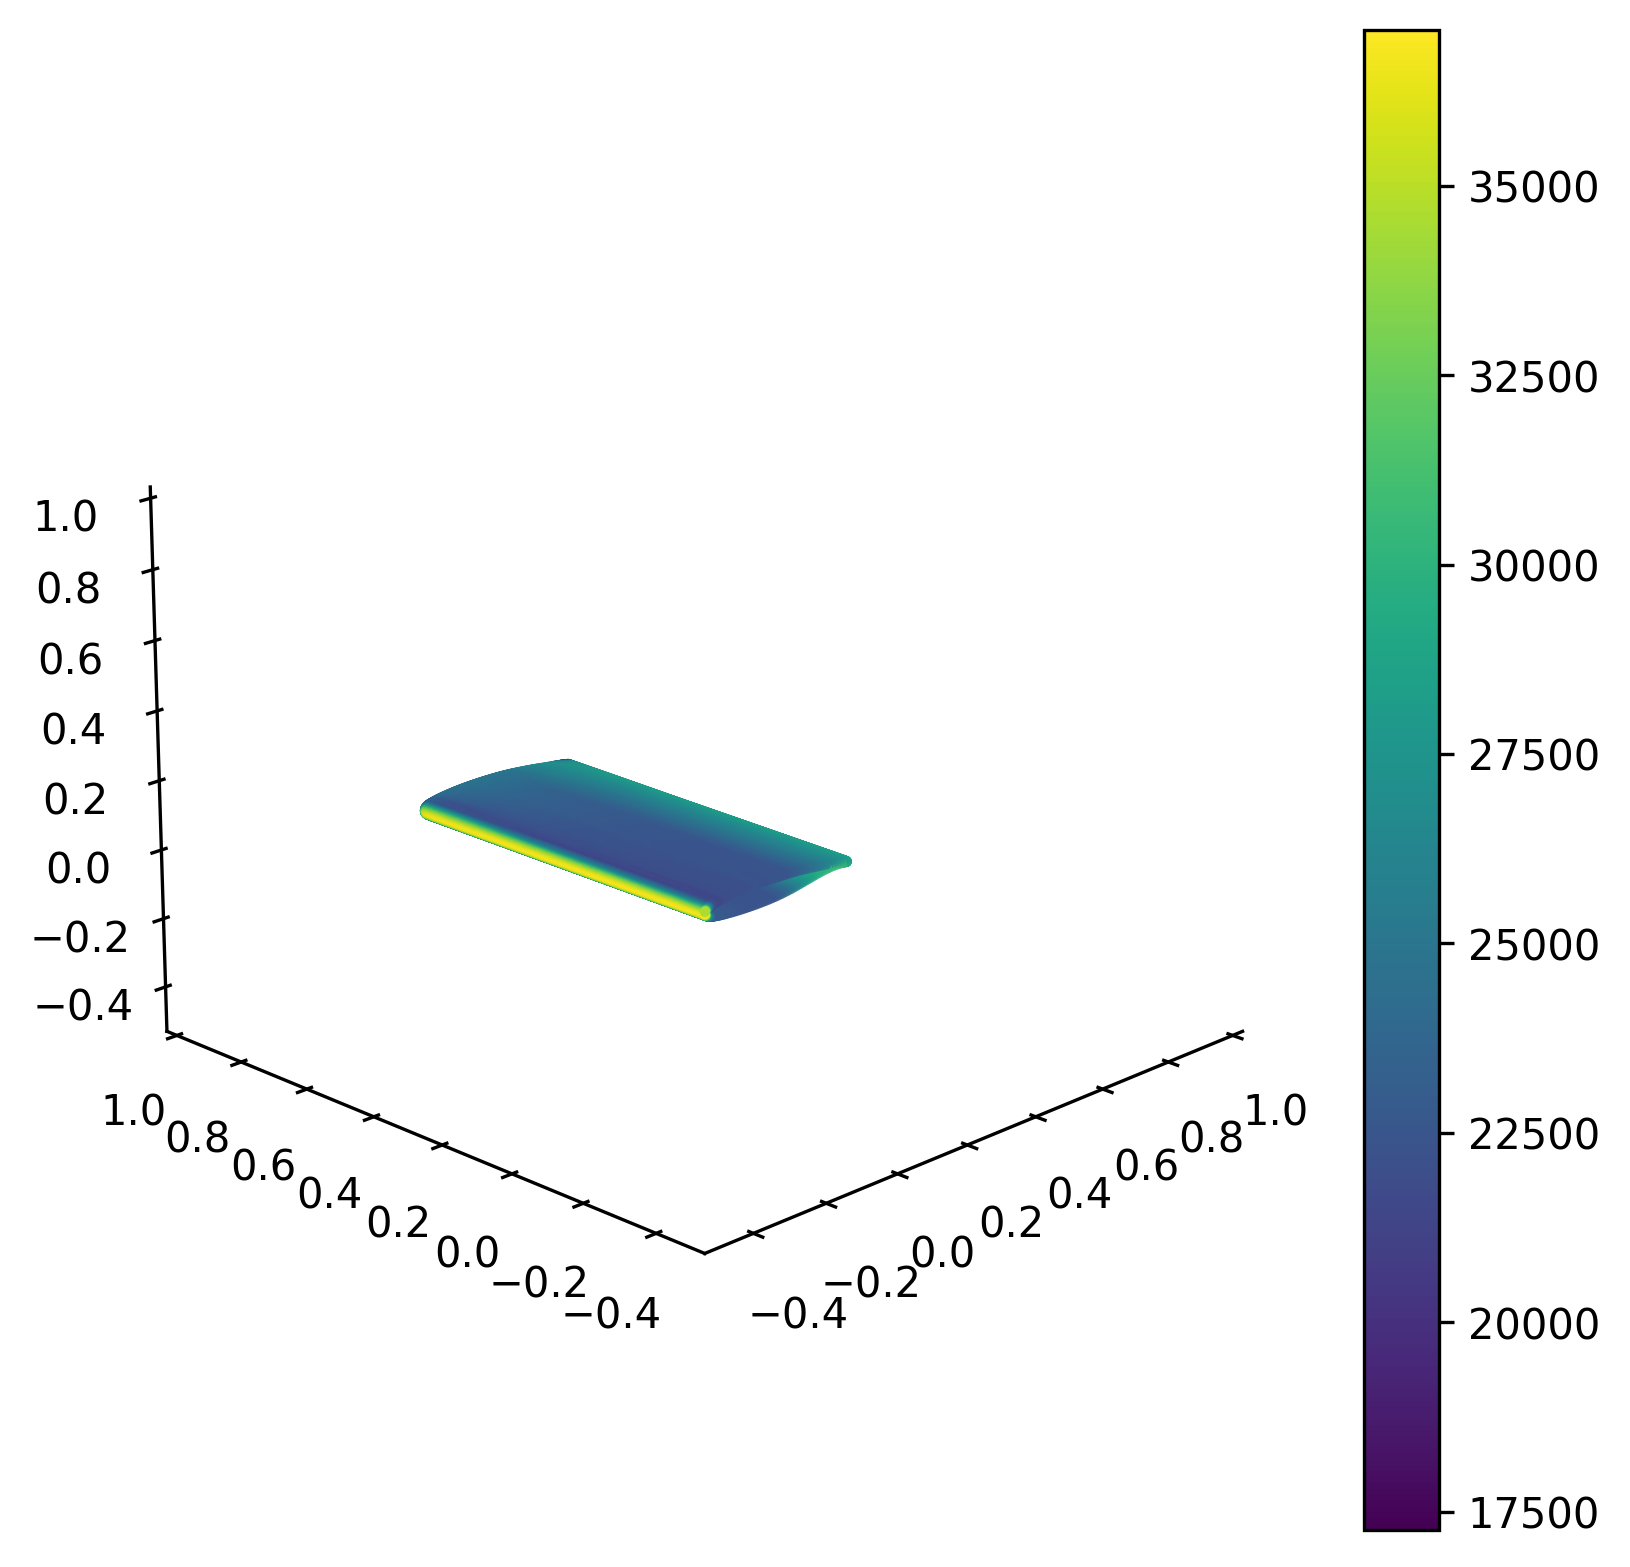

In [16]:
# We will now plot the mean flow
from mpl_toolkits.mplot3d import Axes3D

sizeseq = 2

fig = plt.figure(1, (5,5), dpi=300)
ax = Axes3D(fig)
ax.view_init(20, 225)

# We use the undeformed shape to plot pressure on it
undeformedx = []
undeformedy = []
undeformedz = []
for i in range(len(model.undeformedShape)):
    undeformedx.append(model.undeformedShape[i].ux)
    undeformedy.append(model.undeformedShape[i].uy)
    undeformedz.append(model.undeformedShape[i].uz)

# If we want to plot other modes, we only have to change the index in c = U[:,index]
# Remember the python convention: first element has index 0
p = ax.scatter(undeformedx, undeformedy, undeformedz, c = Xmean, s=sizeseq)

# Set the grid limits
ax.axes.set_xlim3d(left=-0.5, right=1) 
ax.axes.set_ylim3d(bottom=-0.5, top=1) 
ax.axes.set_zlim3d(bottom=-0.5, top=1)

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

# Introduce the colorbar
fig.colorbar(p)

plt.show()

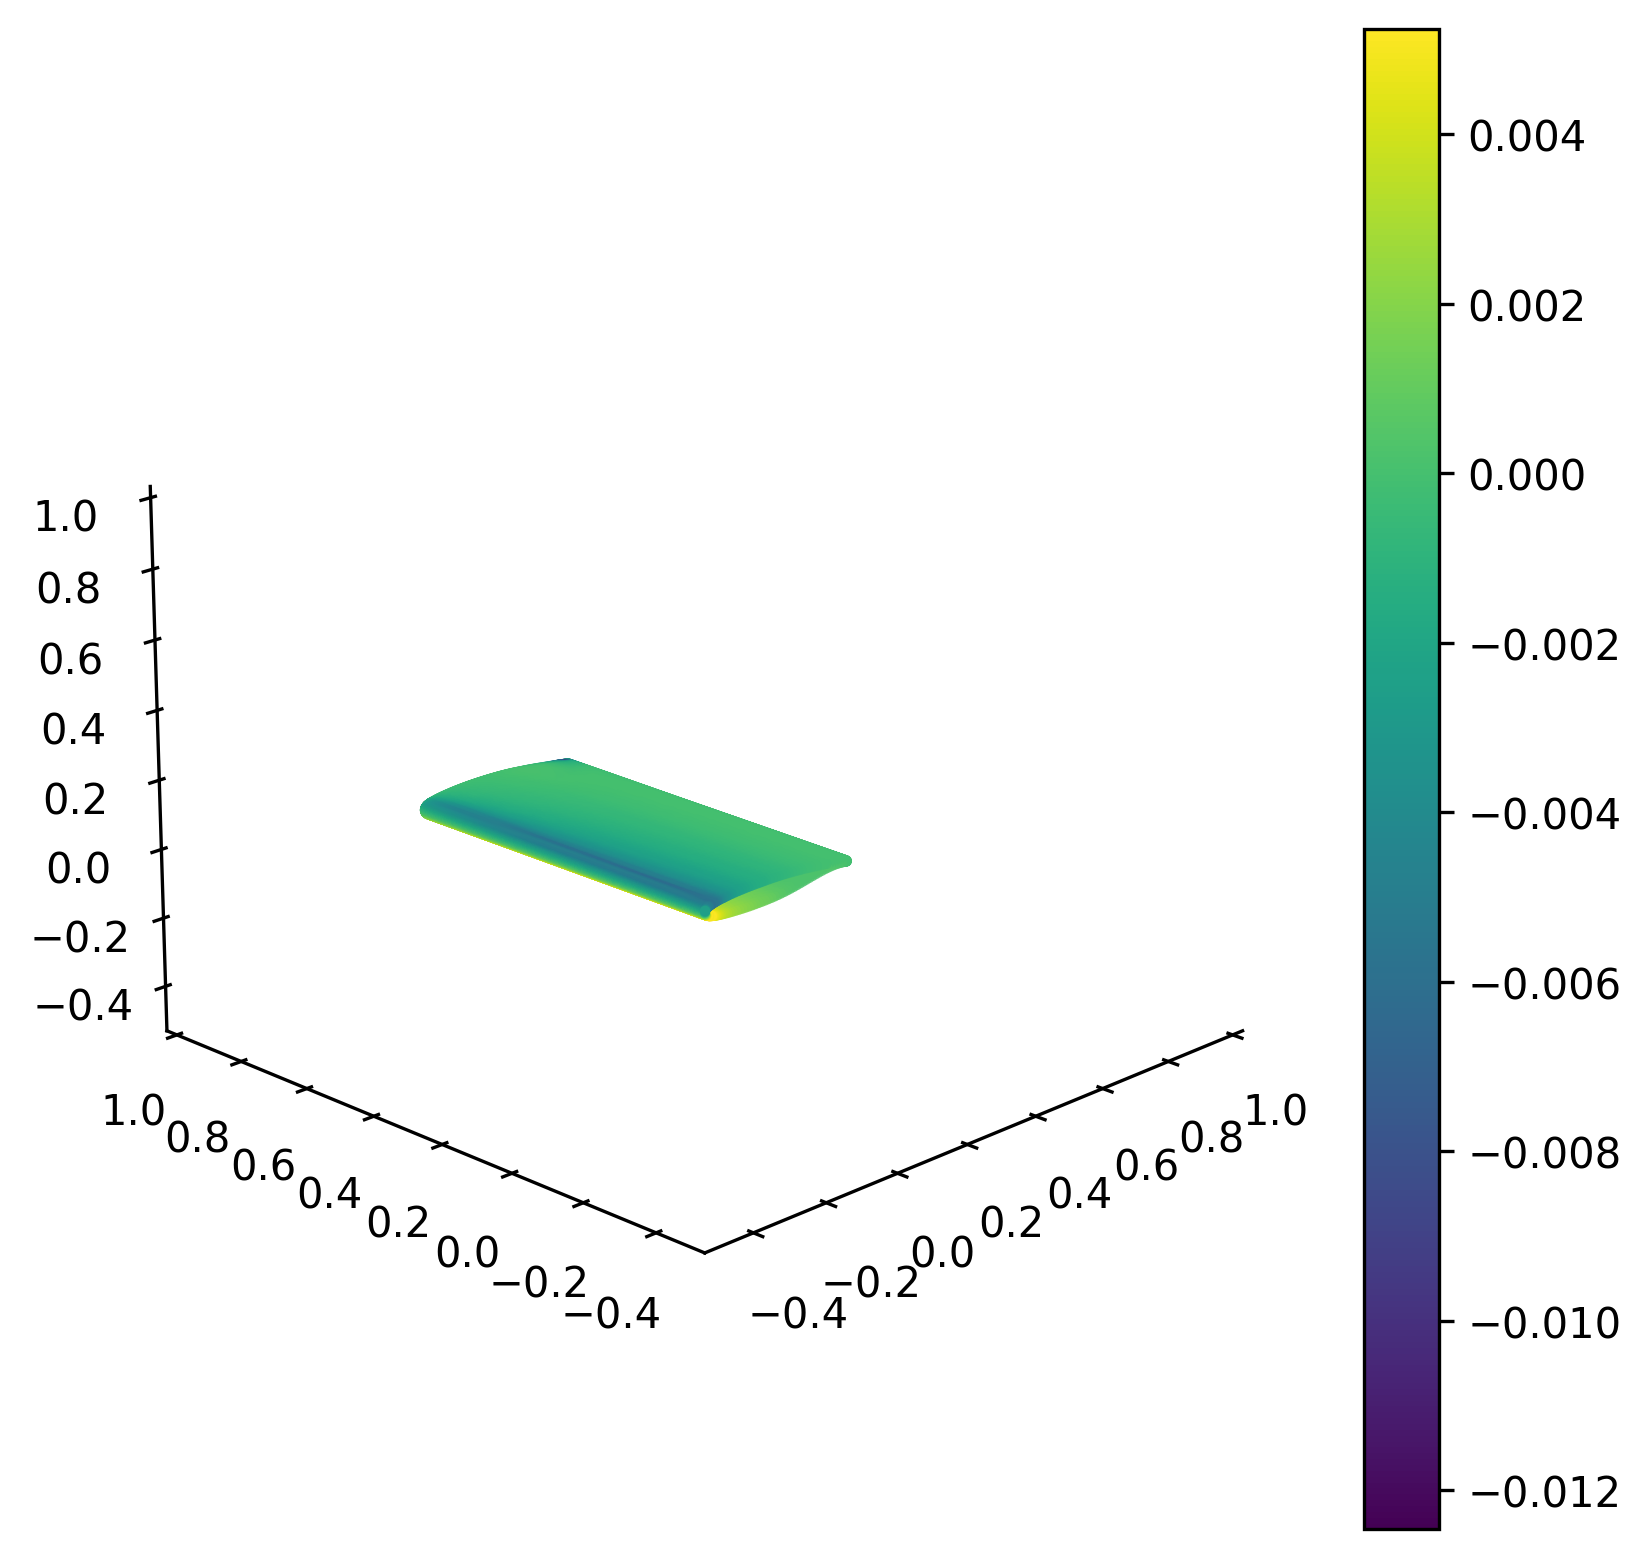

In [17]:
# We will now plot the first mode

sizeseq = 2

fig = plt.figure(1, (5,5), dpi=300)
ax = Axes3D(fig)
ax.view_init(20, 225)

# We use the undeformed shape to plot pressure on it
undeformedx = []
undeformedy = []
undeformedz = []
for i in range(len(model.undeformedShape)):
    undeformedx.append(model.undeformedShape[i].ux)
    undeformedy.append(model.undeformedShape[i].uy)
    undeformedz.append(model.undeformedShape[i].uz)

# If we want to plot other modes, we only have to change the index in c = U[:,index]
# Remember the python convention: first element has index 0
p = ax.scatter(undeformedx, undeformedy, undeformedz, c = U[:,0], s=sizeseq)

# Set the grid limits
ax.axes.set_xlim3d(left=-0.5, right=1) 
ax.axes.set_ylim3d(bottom=-0.5, top=1) 
ax.axes.set_zlim3d(bottom=-0.5, top=1)

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

# Introduce the colorbar
fig.colorbar(p)

plt.show()

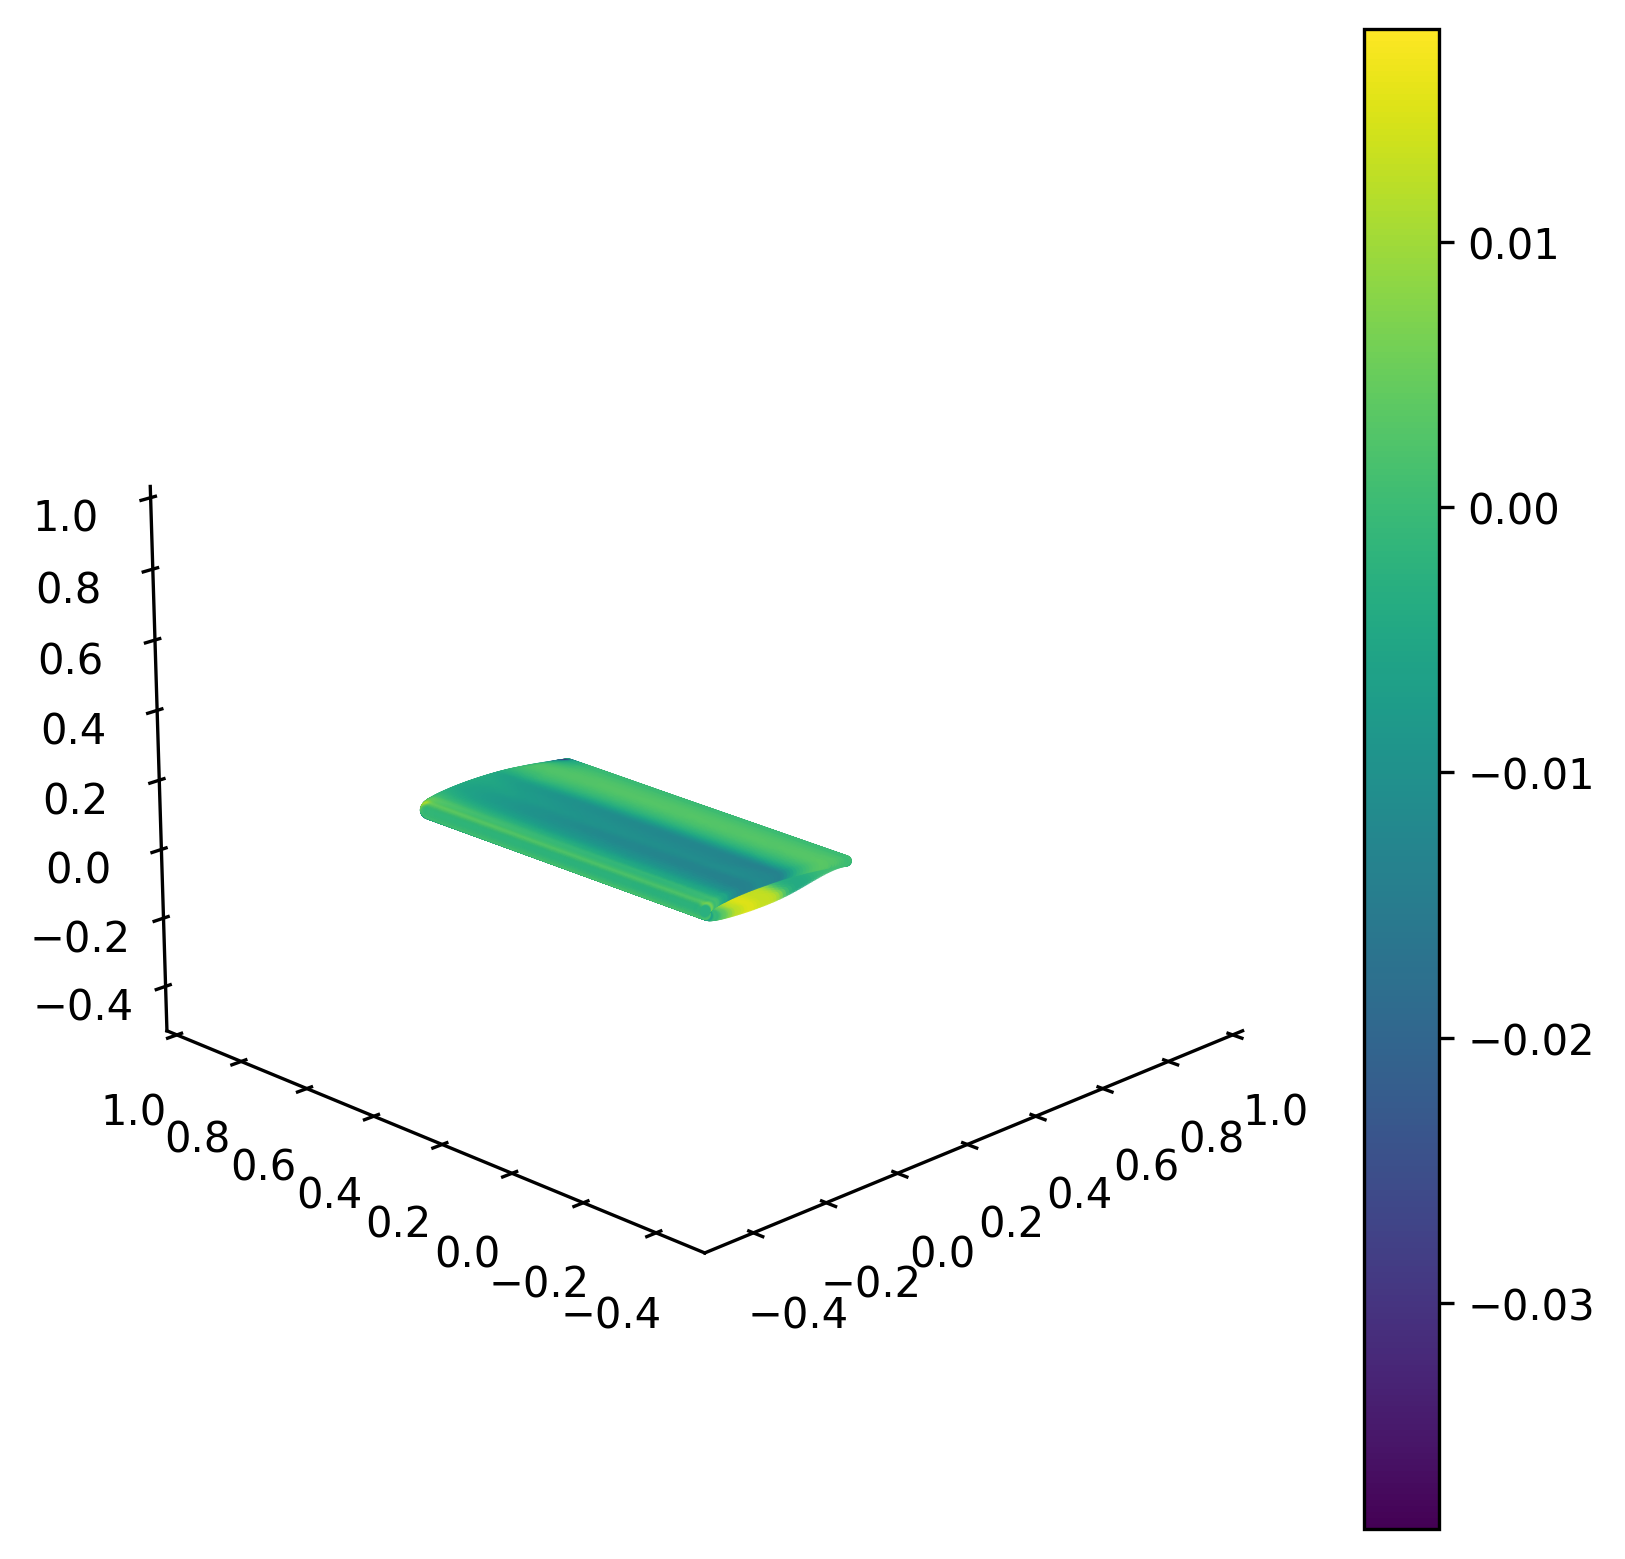

In [22]:
# We will now plot the second mode

sizeseq = 2

fig = plt.figure(1, (5,5), dpi=300)
ax = Axes3D(fig)
ax.view_init(20, 225)

# We use the undeformed shape to plot pressure on it
undeformedx = []
undeformedy = []
undeformedz = []
for i in range(len(model.undeformedShape)):
    undeformedx.append(model.undeformedShape[i].ux)
    undeformedy.append(model.undeformedShape[i].uy)
    undeformedz.append(model.undeformedShape[i].uz)

# If we want to plot other modes, we only have to change the index in c = U[:,index]
# Remember the python convention: first element has index 0
p = ax.scatter(undeformedx, undeformedy, undeformedz, c = -U[:,1], s=sizeseq)

# Set the grid limits
ax.axes.set_xlim3d(left=-0.5, right=1) 
ax.axes.set_ylim3d(bottom=-0.5, top=1) 
ax.axes.set_zlim3d(bottom=-0.5, top=1)

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

# Introduce the colorbar
fig.colorbar(p)

plt.show()